Quantifying amount of DNA produced by PCR reactions with T7InitMix untranscribed + bisulfite treatment vs 1 ul of Thermo 1kb gene ruler. Absolute quantifications done in ImageLab software and exported to csv file.

In [1]:
import pandas as pd
%load_ext rpy2.ipython

In [2]:
%%R

library(ggplot2)
library(ggpubr)
library(RColorBrewer)

R[write to console]: Learn more about the underlying theory at https://ggplot2-book.org/



In [17]:
PCR_SAMPLE_VOLUME = 30  # ul
VOLUME_SAMPLE_PER_LANE = 3  # ul

In [69]:
df_top = pd.read_csv(
    'data/2022-03-15_12h19m20s-T7InitMix-Phu-PCR-cycle-test-Top-lanes.csv', 
    skiprows=1)

df_bot = pd.read_csv(
    'data/2022-03-15_12h19m20s-T7InitMix-Phu-PCR-cycle-test-bottom-lanes.csv',
     skiprows=1
)

df_bot['Lane'] = df_bot['Lane'] + 20
df_bot['Abs. Quant. (ng)'] = df_bot['Abs. Quant.']

df_all = df_top.append(df_bot)
df_all

,Lane,Band No.,Band Label,Mol. Wt. (KDa),Relative Front,Adj. Volume (Int),Volume (Int),Abs. Quant. (ng),Rel. Quant.,Band %,Lane %,Abs. Quant.
0,1,1,NaN,NaN,0.104101,374578,1360772,6.437331,NaN,5.749123,5.653487,NaN
1,1,2,NaN,NaN,0.129338,416484,1234088,7.119985,NaN,6.392307,6.285972,NaN
2,1,3,NaN,NaN,0.167192,642390,1747540,14.000000,NaN,9.859573,9.695560,NaN
3,1,4,NaN,NaN,0.198738,380420,1313300,6.532498,NaN,5.838787,5.741660,NaN
4,1,5,NaN,NaN,0.242902,396382,1419100,6.792521,NaN,6.083776,5.982574,NaN
5,1,6,NaN,NaN,0.271293,427340,1250372,7.296830,NaN,6.558928,6.449821,NaN
6,1,7,NaN,NaN,0.305994,754032,1919166,14.000000,NaN,11.573084,11.380567,NaN
7,1,8,NaN,NaN,0.353312,373336,1683508,6.417099,NaN,5.730060,5.634742,NaN
8,1,9,NaN,NaN,0.413249,359444,1883010,6.190797,NaN,5.516842,5.425070,NaN
9,1,10,NaN,NaN,0.488959,382306,1939728,6.563221,NaN,5.867734,5.770125,NaN


Pipetting issues caused lower sample amounts in last lanes even though they were ran for more cycles. For now just focus on the 5, 10, and 15 cycle samples.

In [71]:
cycles_to_lane = {
    10: (7, 8, 9),
    15: (11, 12, 13),
    25: (23, 24, 25),
    28: (27, 28, 29)

}

lane_to_cycle = {}

for each_cycle, lanes in cycles_to_lane.items():
    for each_lane in lanes:
        lane_to_cycle[each_lane] = each_cycle

lane_to_cycle

{7: 10,
 8: 10,
 9: 10,
 11: 15,
 12: 15,
 13: 15,
 23: 25,
 24: 25,
 25: 25,
 27: 28,
 28: 28,
 29: 28}

In [79]:
df_all['num_cycles']= df_all['Lane'].map(lane_to_cycle)
df_all['num_cycles']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17    10.0
18    10.0
19    10.0
20    15.0
21    15.0
22    15.0
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14    25.0
15    25.0
16    25.0
17    28.0
18    28.0
19    28.0
Name: num_cycles, dtype: float64

In [76]:
df = df_all

In [80]:
df['sample_per_lane'] = VOLUME_SAMPLE_PER_LANE
df['sample_concentration'] = df['Abs. Quant. (ng)'] / df['sample_per_lane']
df['total_sample_DNA_mass_ng'] = df['sample_concentration'] * PCR_SAMPLE_VOLUME

In [81]:
df_means = df.groupby('num_cycles').mean()
df_std = df.groupby('num_cycles').std()

plot_df = pd.DataFrame()
plot_df['mean_concentration_ng'] = df_means['sample_concentration']
plot_df['sd_concentration_ng'] = df_std['sample_concentration']
plot_df['num_cycles'] = plot_df.index

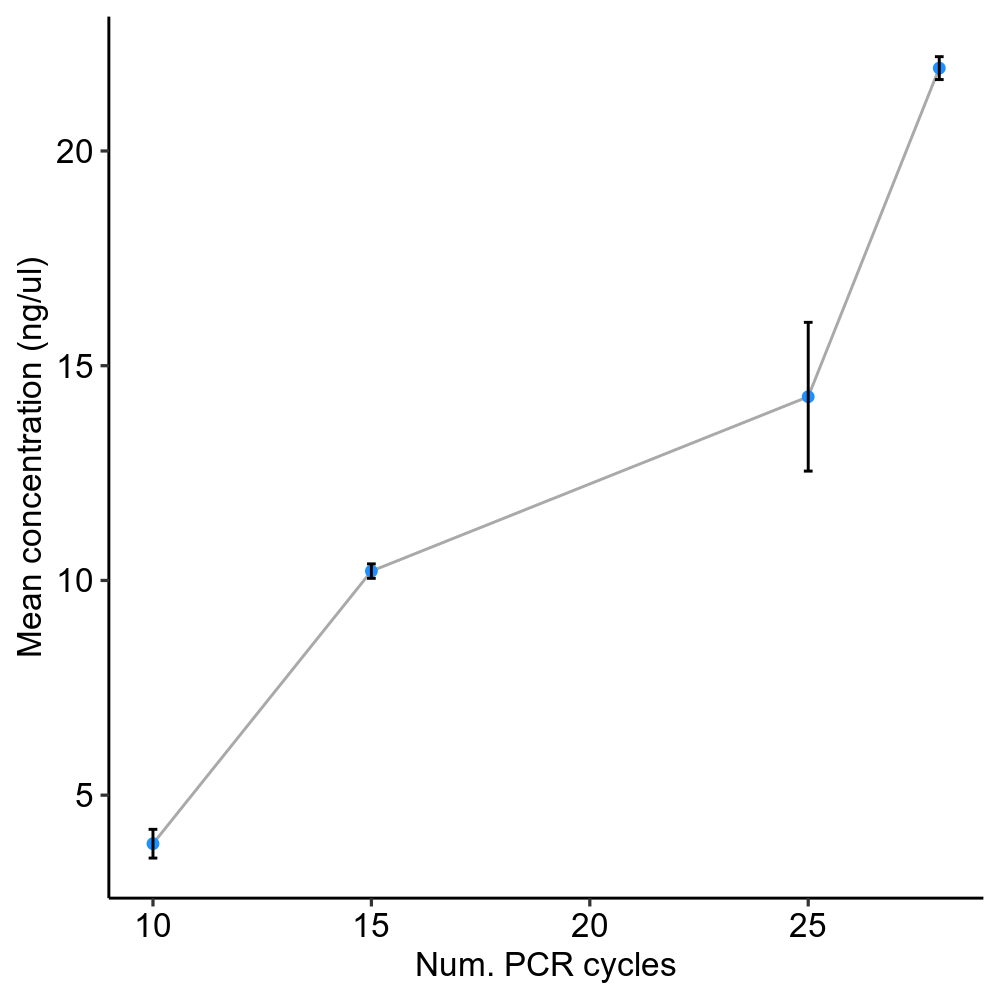

In [84]:
%%R -i plot_df -w 5 -h 5 --units in -r 200

ggplot(plot_df, aes(x=num_cycles, y=mean_concentration_ng)) + 
       geom_line(color='darkgrey') + geom_point(color='dodgerblue') +
        geom_errorbar(
            aes(ymin=mean_concentration_ng-sd_concentration_ng, 
                ymax=mean_concentration_ng+sd_concentration_ng), 
                width=.2, position=position_dodge(.9),
            color='black'
        ) +
        theme_pubr() +
        labs(x='Num. PCR cycles', y='Mean concentration (ng/ul)')